In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

In [7]:
# x axis
initial = 0
end = 2898

current = initial
x_axis = []
while current < 2898:
    x_axis.append(current)
    current += 90

# y axis
days = []
with open("../../../data/analysis/patterns_last_data_point.json") as patterns_file:
    patterns = json.load(patterns_file)
    patterns = sorted(patterns, key=lambda k: k['name'])
    
    for day in x_axis:        
        for pattern in patterns:
            count = 0
            
            for project in pattern["projects"]:
                if day >= project["days"] and project["days"] != -1:
                    count += 1
            days.append({"day": day, "pattern": pattern["name"], "count": count})

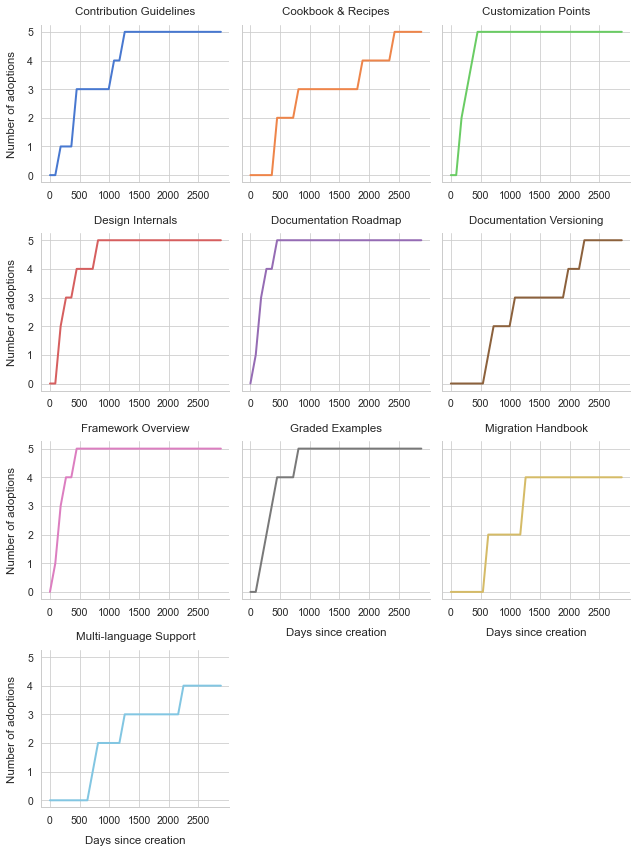

In [8]:
sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif', font_scale=1.2)
df = pd.DataFrame(data={'count': [record["count"] for record in days], 'pattern': [record["pattern"] for record in days], 'day': [record["day"] for record in days]})

g = sns.FacetGrid(df, col="pattern", hue="pattern", col_wrap=3)

g.map(sns.lineplot, "day", "count",  linewidth=2)

for i in range(0, 10):
    g.axes[i].xaxis.labelpad = 10
    g.axes[i].yaxis.labelpad = 10
    g.axes[i].set(xticks=[0, 500, 1000, 1500, 2000, 2500])

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.axes[-1].set(xlabel="Days since creation")
g.axes[-2].set(xlabel="Days since creation")
g.axes[-3].set(xlabel="Days since creation")


g.set_titles(col_template="{col_name}", pad=10)

g.set(ylabel="Number of adoptions")

g.fig.tight_layout()
# g.savefig(f'../../../figures/pattern_adoption/overall_pattern_adoption_over_time.pdf', format='pdf', bbox_inches="tight")